In [1]:
# BeerInfoEDA.ipynb
# Perform Exploratory Data Analysis on Information about the beers themselves
# Written for NYCDSA Bootcamp 7, Capstone Project by LC 2016-12-14

# Data scraped from ratebeer.com consisting of the top 20 - 25 beers for each US State and D.C.
# Note: two datasets were used: One with missing information, and another one to supplement the missing information

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cPickle as pickle
import re

%matplotlib inline

In [2]:
# newly scraped dataset with complete information
new_scraped = pd.read_csv('beer_info_new.csv', index_col = None)
new_scraped.replace('DNE', np.nan, inplace = True)
new_scraped['abv'] = new_scraped['abv'].apply(lambda x: float(re.sub('%', '', str(x))) )
new_scraped['mean'] = new_scraped['mean'].apply(lambda x: float(re.sub('/5.0', '', str(x))))

In [3]:
new_scraped[['wgt_avg','est_cal', 'ibu']] = new_scraped[['wgt_avg','est_cal', 'ibu']].apply(pd.to_numeric)
print new_scraped.dtypes

name              object
wgt_avg          float64
overall_score    float64
style_score      float64
abv              float64
est_cal          float64
beer_desc         object
ibu              float64
mean             float64
dtype: object


In [4]:
new_scraped.head(10)

,name,wgt_avg,overall_score,style_score,abv,est_cal,beer_desc,ibu,mean
0,Good People El Gordo Imperial Stout,3.89,99.0,90.0,13.90,417.0,NaN,65.0,4.13
1,Straight To Ale Laika Russian Imperial Stout -...,3.75,98.0,72.0,11.70,351.0,NaN,NaN,NaN
2,Straight To Ale Laika Russian Imperial Stout,3.75,97.0,71.0,11.70,351.0,"\r\n Second offering from the ""Right to...",74.0,NaN
3,Avondale Barrel Aged Brett Saison,3.69,97.0,95.0,7.50,225.0,\r\n This brew is our regular Saison ag...,NaN,4.01
4,Straight To Ale Laika Russian Imperial Stout -...,3.69,96.0,58.0,11.80,354.0,\r\n Straight To Ale Barrel Aged Laika ...,NaN,NaN
5,Good People Snake Handler,3.68,96.0,84.0,9.30,279.0,"\r\n A big, joyous celebration of all t...",103.0,NaN
6,Straight To Ale Gorillanaut Imperial IPA,3.66,96.0,82.0,9.00,270.0,"\r\n The bigger, badder brother to our ...",275.0,3.76
7,Straight To Ale Velvet Evil,3.65,95.0,91.0,13.00,390.0,\r\n A variant of the same old ale used...,NaN,3.76
8,Good People Fatso Imperial Stout,3.61,95.0,47.0,8.50,255.0,\r\n First debuted at the 2009 Magic Ci...,NaN,3.69
9,Straight To Ale Monkey’s Uncle IIPA,3.62,94.0,73.0,7.75,232.0,\r\n This Imperial IPA is packed with h...,NaN,3.74


In [10]:
#old scraped data with missing values. we still use some of the values with complete information, such as style
# and brewer, which were not re-scraped.
beer_info = pd.read_csv('beer_info_clean.csv', index_col = None)
beer_info.head(10)

,state,beer_rank,beer_name,beer_style,brewer,review_count,overall_score,style_score,wgt_avg,abv,est_cal,mean,ibu,beer_desc,beer_img
0,ALABAMA,1,Good People El Gordo Imperial Stout,Imperial Stout,Good People Brewing Company,15,99.0,90.0,3.89,13.90,417.0,4.13,65.0,NaN,http://res.cloudinary.com/ratebeer/image/uploa...
1,ALABAMA,2,Straight To Ale Laika Russian Imperial Stout -...,Imperial Stout,Straight To Ale,53,98.0,72.0,NaN,11.70,351.0,NaN,NaN,NaN,http://res.cloudinary.com/ratebeer/image/uploa...
2,ALABAMA,3,Straight To Ale Laika Russian Imperial Stout,Imperial Stout,Straight To Ale,55,97.0,71.0,NaN,NaN,74.0,NaN,NaN,"Second offering from the ""Right to Brew"" serie...",http://res.cloudinary.com/ratebeer/image/uploa...
3,ALABAMA,4,Avondale Barrel Aged Brett Saison,Saison,Avondale Brewing Company,10,97.0,95.0,3.69,7.50,225.0,4.01,NaN,This brew is our regular Saison aged in french...,http://res.cloudinary.com/ratebeer/image/uploa...
4,ALABAMA,5,Straight To Ale Laika Russian Imperial Stout -...,Imperial Stout,Straight To Ale,48,96.0,58.0,NaN,11.80,354.0,NaN,NaN,Straight To Ale Barrel Aged Laika Russian Impe...,http://res.cloudinary.com/ratebeer/image/uploa...
5,ALABAMA,6,Good People Snake Handler,Imperial IPA,Good People Brewing Company,119,96.0,84.0,NaN,9.30,279.0,NaN,103.0,"A big, joyous celebration of all things hoppy ...",http://res.cloudinary.com/ratebeer/image/uploa...
6,ALABAMA,7,Straight To Ale Gorillanaut Imperial IPA,Imperial IPA,Straight To Ale,29,96.0,82.0,3.66,9.00,270.0,3.76,275.0,"The bigger, badder brother to our flagship Mon...",http://res.cloudinary.com/ratebeer/image/uploa...
7,ALABAMA,8,Straight To Ale Velvet Evil,Old Ale,Straight To Ale,25,95.0,91.0,3.65,13.00,390.0,3.76,NaN,A variant of the same old ale used as the base...,http://res.cloudinary.com/ratebeer/image/uploa...
8,ALABAMA,9,Good People Fatso Imperial Stout,Imperial Stout,Good People Brewing Company,36,95.0,47.0,3.61,8.50,255.0,3.69,NaN,First debuted at the 2009 Magic City Brewfest ...,http://res.cloudinary.com/ratebeer/image/uploa...
9,ALABAMA,10,Straight To Ale Monkeys Uncle IIPA,Imperial IPA,Straight To Ale,21,94.0,73.0,3.62,7.75,232.0,3.74,NaN,This Imperial IPA is packed with hoppy goodnes...,http://res.cloudinary.com/ratebeer/image/uploa...


In [6]:
with open ('beer_dict.p', 'rb') as f:
    names = pickle.load(f)

In [ ]:
beer_info.count()

In [8]:
# some of the info, such as ibu and mean, are simply missing from the website. manually cross-checked.
new_scraped.count()

name             1273
wgt_avg          1274
overall_score    1232
style_score      1232
abv              1230
est_cal          1230
beer_desc        1158
ibu               431
mean              527
dtype: int64

In [ ]:
a = new_scraped['overall_score']
overall_score = a[a.notnull()]

b = new_scraped['style_score']
style_score = b[b.notnull()]

In [42]:
beer_info.review_count.sum()

278066

In [19]:
new_scraped.describe().round(2)

,wgt_avg,overall_score,style_score,abv,est_cal,ibu,mean
count,1274.00,1232.00,1232.00,1230.00,1230.00,431.00,527.00
mean,3.79,94.58,87.96,8.89,266.73,58.69,3.81
std,0.28,11.35,17.73,2.76,82.93,33.88,0.33
min,2.49,11.00,9.00,3.10,93.00,4.00,2.30
25%,3.63,95.00,85.00,6.70,201.00,32.00,3.64
50%,3.83,99.00,96.00,8.50,255.00,60.00,3.84
75%,3.99,100.00,99.00,10.80,324.00,79.00,4.05
max,4.41,100.00,100.00,27.00,810.00,280.00,4.56


In [2]:
#bins = np.arange(0,106, 5)
#plt.hist(overall_score, bins=bins)


In [3]:
#bins = np.arange(80,103, 2)
#plt.hist(overall_score, bins=bins)


In [4]:
#bins = np.arange(0,106, 5)
#plt.hist(style_score, bins=bins)



In [5]:
#bins = np.arange(80,103, 2)
#plt.hist(style_score, bins=bins)

In [6]:
#c = beer_info['review_count']
#plt.hist(c,bins = np.arange(c.min(), c.max(), 50), color = 'pink')

['wgt_avg', 'overall_score', 'style_score', 'abv', 'est_cal', 'ibu', 'mean'] 4 2


IndexError: list index out of range

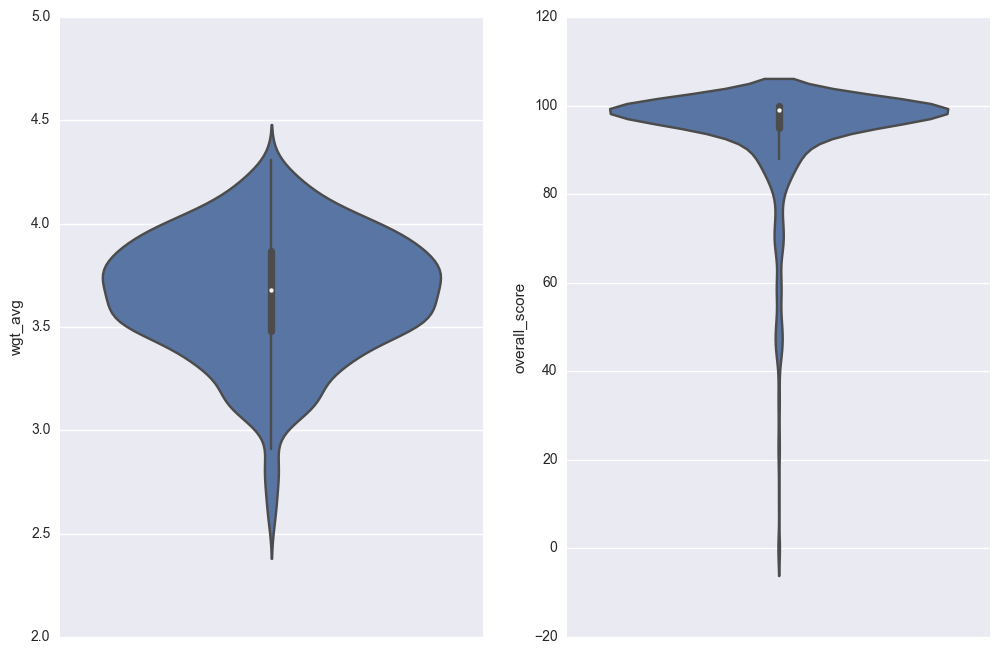

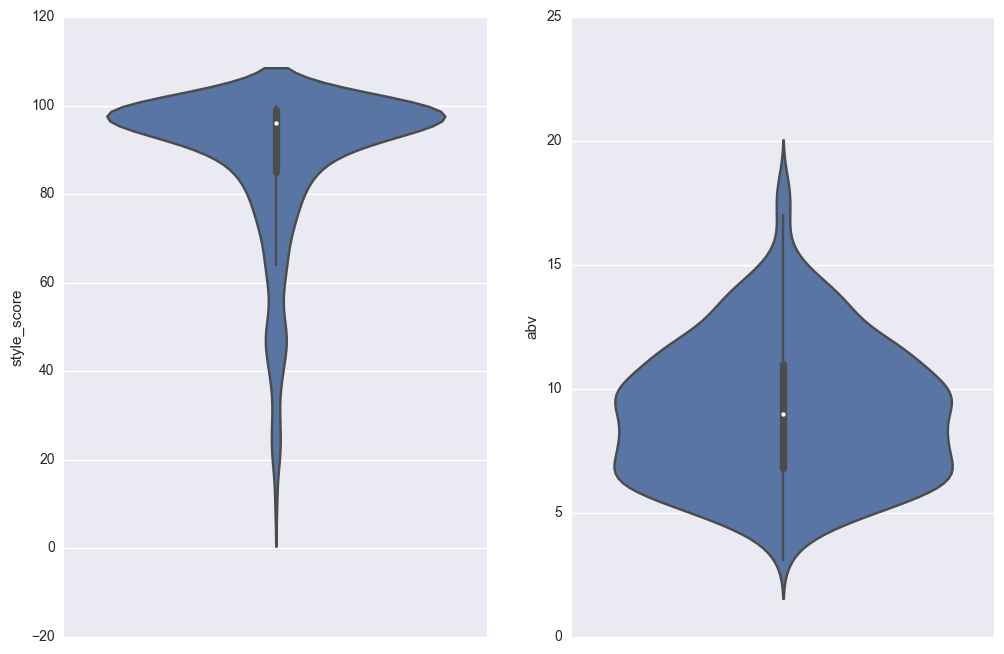

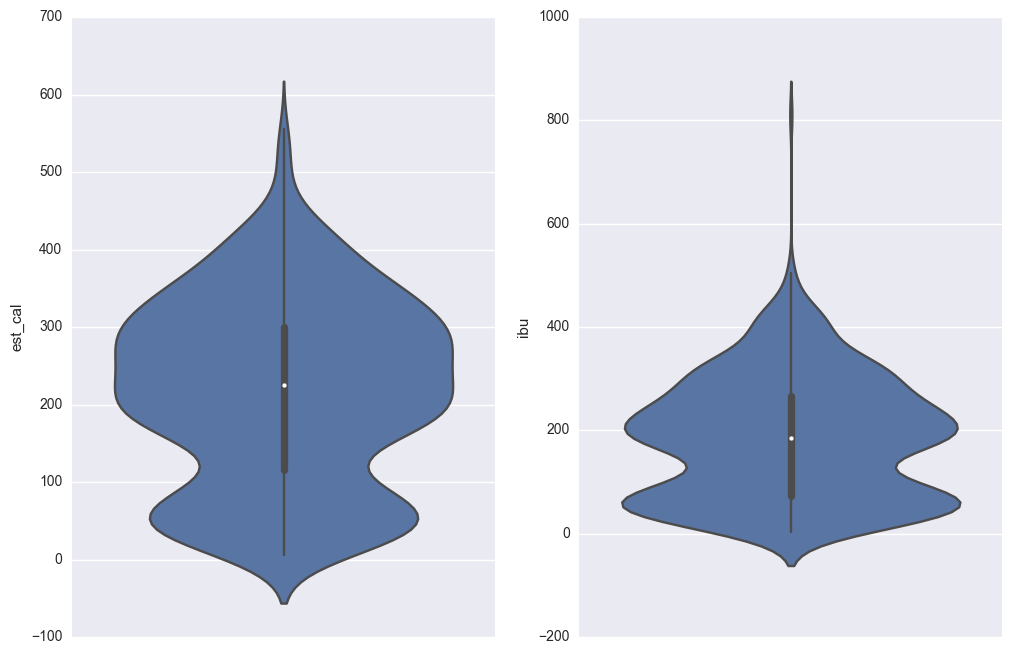

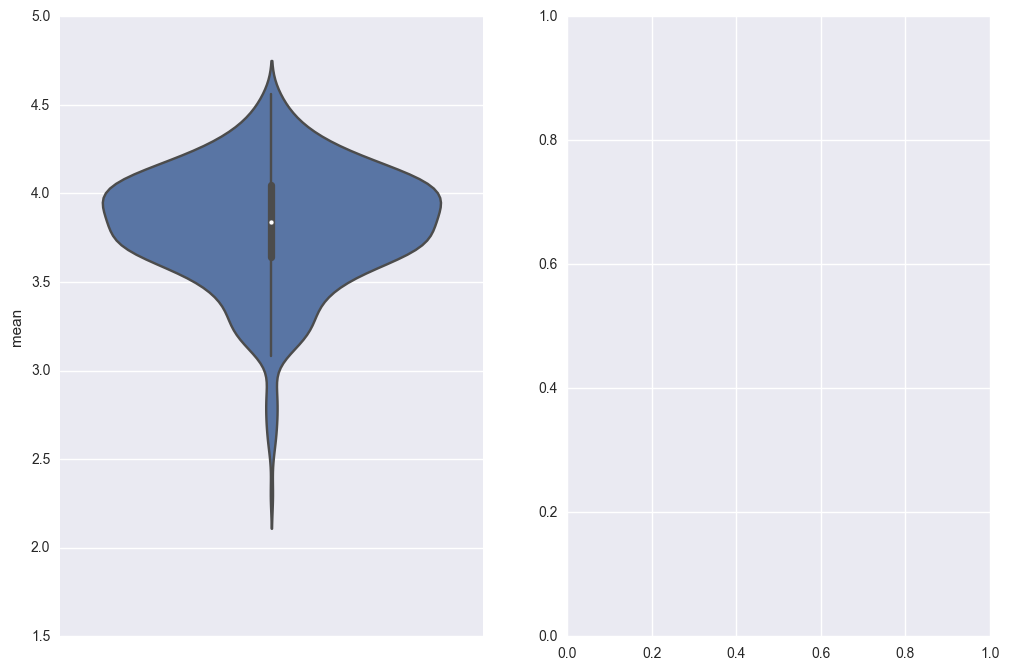

In [94]:
col_names = new_scraped.columns.tolist()[1:6] + new_scraped.columns.tolist()[7:9] # continuous columns

n_rows = len(col_names) % 2 + len(col_names) / 2 
n_cols = 2
print col_names, n_rows, n_cols
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=col_names[i*n_cols+j], data=beer_info, ax=ax[j])
#sns.violinplot(y = ['style_score'], data = beer_info)

In [140]:
style_count = len(beer_info['beer_style'].unique())
print style_count

brewer_count = len(beer_info['brewer'].unique())
print brewer_count

58
335


In [138]:
brewer_counts = beer_info['brewer'].value_counts()
pd.DataFrame({'count': brewer_counts})


,count
Toppling Goliath,22
Three Floyds Brewing Company,22
Hill Farmstead Brewery,21
Westbrook Brewing,21
Prairie Artisan Ales,21
Superstition Meadery,17
Nebraska Brewing Company,16
Dogfish Head Brewery,15
Wicked Weed Brewing,15
Trillium Brewing Company,14


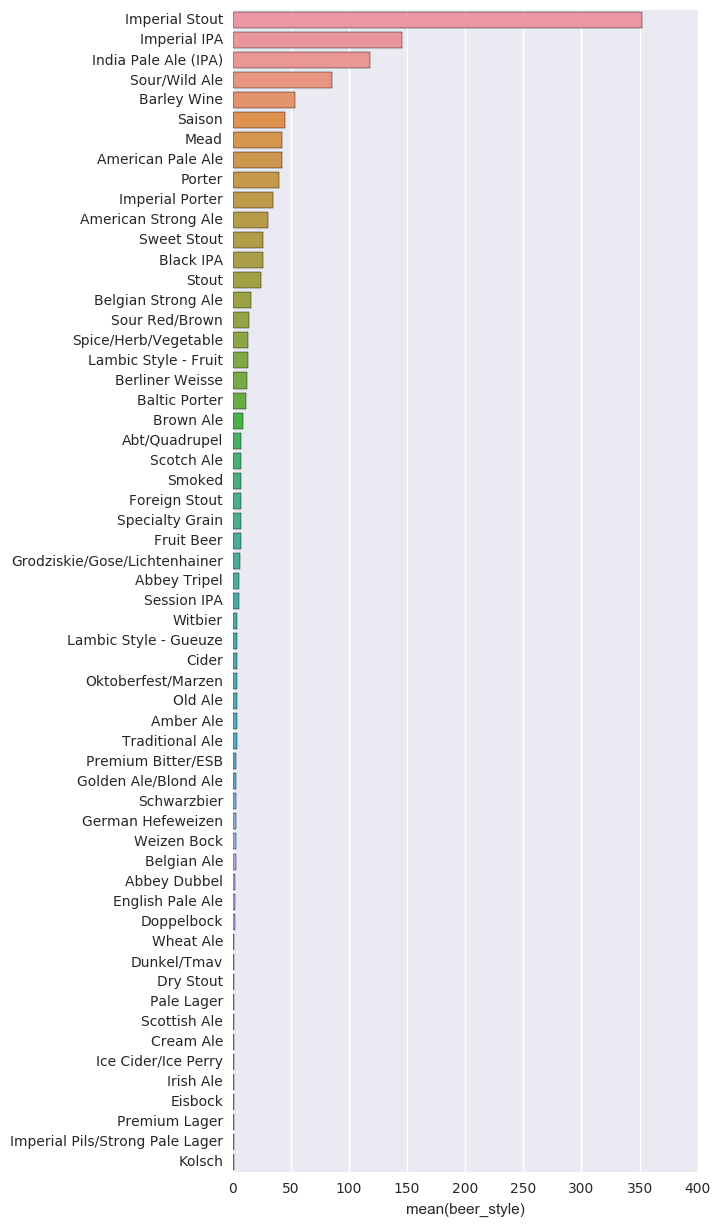

In [149]:
f, ax = plt.subplots(figsize=(6, 15))
# side note: df.col.count is a series w/ index being the column
style_sns = sns.barplot(x=beer_info.beer_style.value_counts(), y=beer_info.beer_style.value_counts().index)
#for p in style_sns.patches:
#        style_sns.annotate('{:.1f}'.format(p.get_width()), (p.get_y()+50, p.get_width()+.1))

In [15]:
style_counts = beer_info['beer_style'].value_counts()
pd.DataFrame({'count': style_counts}).head(20)


,count
Imperial Stout,352
Imperial IPA,146
India Pale Ale (IPA),118
Sour/Wild Ale,85
Barley Wine,54
Saison,45
Mead,42
American Pale Ale,42
Porter,40
Imperial Porter,35


In [16]:
style_counts = beer_info['beer_style'].value_counts()
pd.DataFrame({'count': style_counts})


,count
Imperial Stout,352
Imperial IPA,146
India Pale Ale (IPA),118
Sour/Wild Ale,85
Barley Wine,54
Saison,45
Mead,42
American Pale Ale,42
Porter,40
Imperial Porter,35


In [ ]:
# correlations?
